In [ ]:
import tensorflow as tf # tested with 1.14.0
import numpy as np # tested with 1.16.4
import matplotlib.pyplot as plt #tested with 3.0.3
from sklearn.metrics import classification_report # tested with 0.21.2l
import logging
logging.getLogger('tensorflow').disabled = True


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print("Train Image shape: " ,x_train.shape)
print("Test Image shape: " ,x_test.shape)

Train Image shape:  (60000, 28, 28)
Test Image shape:  (10000, 28, 28)


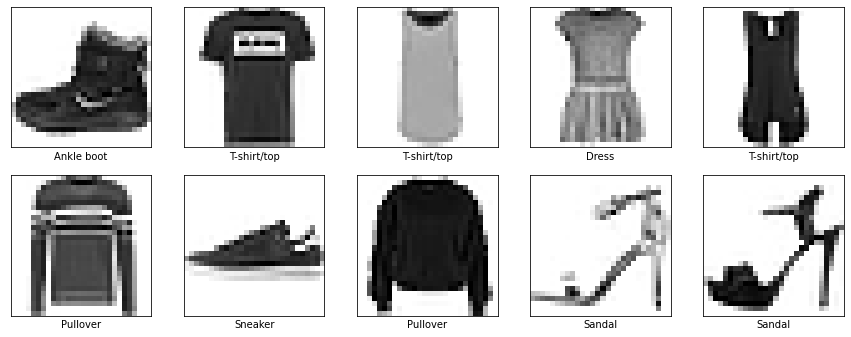

In [ ]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D( filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1))) 

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add( tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
from gc import callbacks
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
history = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_split=0.1, verbose=1, callbacks = [callback]) 

Epoch 1/20
211/211 [==============================] - 27s 126ms/step - loss: 0.5246 - accuracy: 0.8175 - val_loss: 0.3696 - val_accuracy: 0.8678
Epoch 2/20
211/211 [==============================] - 26s 125ms/step - loss: 0.3447 - accuracy: 0.8789 - val_loss: 0.3264 - val_accuracy: 0.8827
Epoch 3/20
211/211 [==============================] - 28s 133ms/step - loss: 0.2984 - accuracy: 0.8949 - val_loss: 0.2940 - val_accuracy: 0.8935
Epoch 4/20
211/211 [==============================] - 26s 125ms/step - loss: 0.2743 - accuracy: 0.9009 - val_loss: 0.2777 - val_accuracy: 0.9002
Epoch 5/20
211/211 [==============================] - 26s 125ms/step - loss: 0.2548 - accuracy: 0.9071 - val_loss: 0.2695 - val_accuracy: 0.9022
Epoch 6/20
211/211 [==============================] - 26s 124ms/step - loss: 0.2367 - accuracy: 0.9139 - val_loss: 0.2558 - val_accuracy: 0.9060
Epoch 7/20
211/211 [==============================] - 26s 124ms/step - loss: 0.2211 - accuracy: 0.9186 - val_loss: 0.2534 - val_ac

In [ ]:
def plot_acc_loss(history):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_figheight(5)
  fig.set_figwidth(15)
  fig.suptitle('accuracy and loss of model')
  ax1.plot(history.history["loss"],label="loss")
  ax1.plot(history.history["val_loss"],label="val_loss")
  ax2.plot(history.history["accuracy"],label="train")
  ax2.plot(history.history["val_accuracy"],label="validation")
  plt.legend()

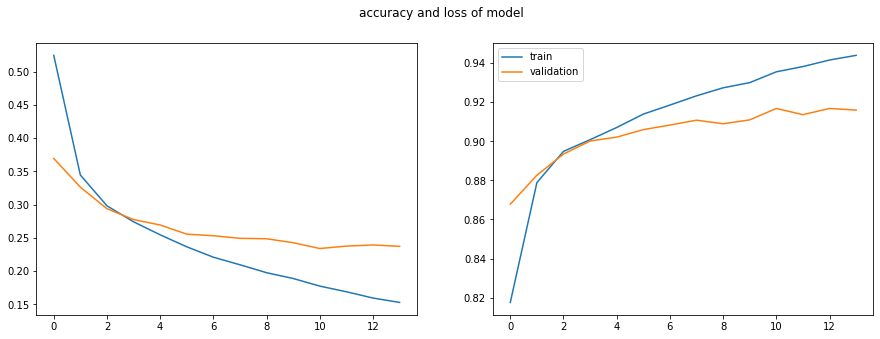

In [ ]:
plot_acc_loss(history)

In [ ]:
predicted = model.predict(x_test)
predicted = list(np.argmax(predicted, axis=1))
print(classification_report(y_test, predicted, target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.87      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.87      0.88      1000
       Dress       0.89      0.96      0.92      1000
        Coat       0.89      0.85      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.76      0.76      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

